# Chapter 1a. Atomic Form Factor

In this section, we will start to look at how the scattering of an X-ray relates to determining an object's structure. This relationship is shown through a value called the atomic form factor. The goals of this section are to understand what the form factor is; how it can be found; and the physical phenomena that introduce complexities into its calculation.

## 1a.1 Setting the scene

In [3]:
%%capture
# Suppress warning output when importing matplotlib.
%matplotlib inline
# To enable interactive figures in the IPython notebook: use '%matplotlib notebook' instead
# But this interactive mode has some display problems.

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
plt.rcParams["figure.figsize"] = (8, 6)
from IPython.display import HTML
import numpy as np

In [4]:
# add path to the Modules
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..', 'src'))

## 1a.2 Form Factor Definition and Calculations

The atomic form factor is the the scattering factor of an atom on incident radiation, in this case X-rays. <br>

Another way of describing the atomic form factor is the ratio of the amplitude of the wave scattered by a particular atom vs. the amplitude scattered by a single electron. It shows the amplification obtained by the presence of multiple electrons in an atom.

The atomic form factor is the Fourier transform of the electron density. The electron density is assumed to be spherically symmetric so that the density only dependds on the distance from the origin in reciprocal space. The form factor is well-approximated by a sum of Gaussians of the form:

\begin{equation}
f(q) = \sum_{i=1}^5 a_i e^{-b_i(\frac{q}{4\pi})^2}+c
\end{equation}



The Waasmaier-Kirfel coefficients (a's, b's, and c) are given in a set of tables with the calculations for the form factors for a large number of elements.

This is a reasonable approximation when the scattering wavelength is $0 \lt \lambda \lt 0.25$ $\unicode{xC5}^{-1}$.

The depends on the type of scattering. With Thomson scattering, the scattering occurs elastically so that the charged particle's kinetic energy and the photon's frequency do not measurably change. 


 


In [5]:
atomType, charge, a1, a2, a3, a4, a5, c, b1, b2, b3, b4, b5 = [6.000000, 0.000000, 2.657506, 
                                                               1.078079, 1.490909, -4.241070, 
                                                               0.713791, 4.297983, 14.780758, 
                                                               0.776775, 42.086842, -0.000294, 
                                                               0.239535]

In [6]:
q_sample = np.linspace(0, 10, 101) / (2.0 * np.pi * 0.529177206 * 2.0)
fv = (a1 * np.exp(-b1 * q_sample ** 2) +
      a2 * np.exp(-b2 * q_sample ** 2) +
      a3 * np.exp(-b3 * q_sample ** 2) +
      a4 * np.exp(-b4 * q_sample ** 2) +  
      a5 * np.exp(-b5 * q_sample ** 2) + c)

In [7]:
atomTypeN,chargeN,a1N,a2N, a3N, a4N, a5N, cN, b1N, b2N, b3N, b4N, b5N = [7.000000,0.000000,11.893780,3.277479,1.858092,0.858927,0.912985,-11.804902,0.000158,10.232723,30.344690,0.656065,0.217287]

In [8]:
q_sample = np.linspace(0, 10, 101) / (2.0 * np.pi * 0.529177206 * 2.0)
fvN = (a1N * np.exp(-b1N * q_sample ** 2) +
      a2N * np.exp(-b2N * q_sample ** 2) +
      a3N * np.exp(-b3N * q_sample ** 2) +
      a4N * np.exp(-b4N * q_sample ** 2) +  
      a5N * np.exp(-b5N * q_sample ** 2) + cN)

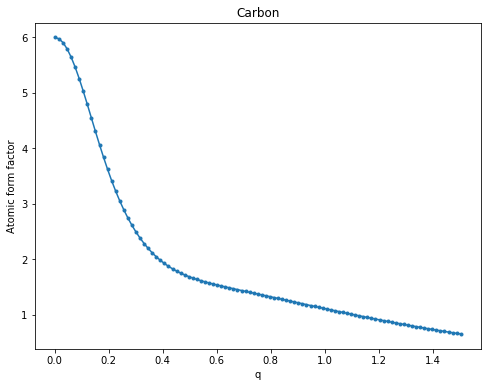

In [12]:
plt.plot(q_sample, fv, '.-')
plt.ylabel('Atomic form factor')
plt.xlabel('q')
plt.title('Carbon')
plt.show()

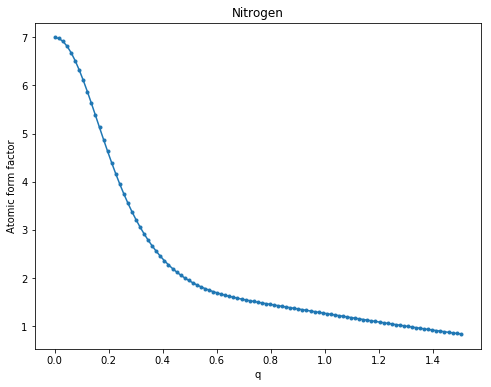

In [10]:
plt.plot(q_sample, fvN, '.-')
plt.ylabel('Atomic form factor')
plt.xlabel('q')
plt.title('Nitrogen')
plt.show()

As a result of the nature of the Fourier transform, the broader the density distribution $\rho$ in real space, the narrower distribution of the function in reciprocal space , i.e. the faster decay of the form factor.

Notice that the amplitude peak of the form factor curve is equal to the number of electrons (C: Z=6 and N: Z=7). for a larger molecule, the form factor is the sum of the individual atoms (i.e. 13 in this case).

The parameter $q$ is proportional to $\frac{\sin{\theta}}{\lambda}$. It has units of inverse angstroms because:

$$\frac{\sin{\theta}}{\lambda} = \frac{1}{2d}$$,

--the Bragg equation in which wavelength and scattering angle are inversely proportional to the resolution, as mentioned in the last section.

To reiterate, the form factor depends on the number of the electrons. Thus, the peak of 29 could relate to $Zn^+$ or $Cu$.

The longer tail of the atomic form factor curve for larger elements has to do with the smaller orbital radius of inner shell electrons due to the larger charge of the nucleus.

Note that the amplitude does not give the full details of the atomic structure, because we also need the phase information. 

## 1a.3 Form factor complexities

### 1a.3.1 Temperature effects

In actual cases, there will be an additional weakening by the Debye-Waller equation factor, also called the B-factor. It is a function of temperature, related to the mean displacement of a vibrating atom $<u>$,

$$B = 8n^2 <u>^2$$

As $u$ is given in $A$, the units of $B$ are $A^2$. 

B-values for normal regions in protein molecules lie between 5 (backbones) and 20 (side chains).

$$f_B = f \dot e^{-B\frac{\sin{\theta}}{\lambda}}$$

In most protein structures, it suffices to assume the average displacement is isotropic. At higher resolution, anisotropy comes into play, and $u$ is replaced by a 3 x 3 tensor $u_{ij}$.

In [16]:
q = np.linspace(0,10,101)/(2.0*np.pi*0.529177206*2.0)
B1 = 0.0
B2 = 5.0
occ = 1.0
fB1 = occ * fv * np.exp(-B1*q)
fB2 = occ * fv * np.exp(-B2*q)

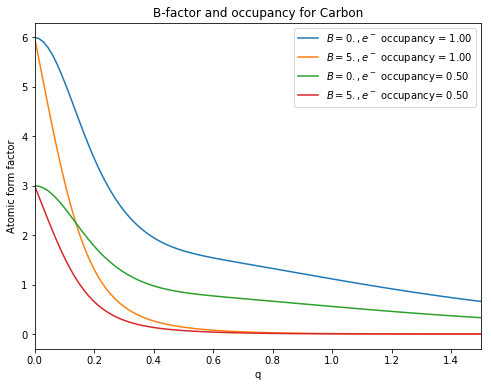

In [17]:
b1 = '%.2f' % B1
b2 = '%.2f' % B2
occA = '$B = %.2s,e^-$ occupancy= %.2f' % (b1,0.5)
occB = '$B = %.2s,e^-$ occupancy= %.2f' % (b2,0.5)
occC = '$B = %.2s,e^-$ occupancy = %.2f' % (b1,1.0)
occD = '$B = %.2s,e^-$ occupancy = %.2f' % (b2, 1.0)
plt.plot(q,fv, label=occC)
plt.plot(q,fB2, label=occD)
plt.xlabel('q')
plt.ylabel('Atomic form factor')
plt.title('B-factor and occupancy for Carbon')
plt.plot(q,0.5*fv,label=occA)  # electron occupancy = 0.5, B = 0.0
plt.plot(q,0.5*fB2,label=occB)  # electron occupancy = 0.5, B = 5.0
plt.legend(loc='upper right')
plt.xlim((0.0,1.5))
plt.show()

 Babinet's principle is a structure factor correction that takes into account the effects of solvent scattering.

$$f_i(q) = f^v_i(q) - C_1(q)f^s_i(q) + c_2 s_i f^w(q)$$ <br>

$f_i(q)$: corrected form factor <br>
$f^v_i(q)$: form factor in vacuo <br>
$f^s_i$: form factor of dummy atom <br>
$s_i$: fraction of the solvent-accessible surface for atom $i$ <br>

The function $C_1(q)$:

$$C_1(q) = c^3_1 \exp{\left(\left(\frac{-4\pi)}{3}\right)^{1.5} q^2 r_m^2 \frac{(c^2_1 - 1)}{4\pi}\right)}$$ <br>

where $c_1$ is the scaling of the atomic radius, $r_m$ is the atomic radius, and $c_2$ is the adjustment factor for the density difference between the hydration layer and the bulk water. We will make that value 0 here.

### 1a.3.2  Solvent scattering effects (Babinet's principle)

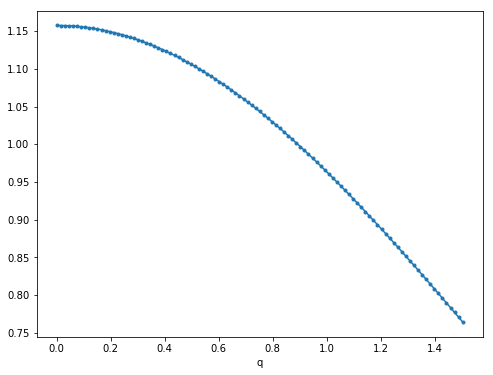

In [18]:
c1 = 1.05 # 0.95 <= c1 <= 1.05
rm = 1.62 # 1.4 <= rm <= 1.8
C1 = c1**3 * np.exp( -1*(4*np.pi/3)**1.5 * q**2 * rm**2 * (c1**2-1) / (4*np.pi) )
plt.plot(q,C1,'.-')
plt.xlabel('q')
plt.show()

### 1a.3.3 Anomalous scattering (dispersion)

So far, we have assumed that all the electrons can be treated as free electrons. However, stronger scattering can be caused by a resonance effect; when the photon energy of the X-ray is close to an absorption edge (i.e. the frequency of the X-ray is close to the frequency of bound electrons). That means that the form factor equation becomes:



$$f(q) = f_0(q) + f' + if''$$


The first part is the base atomic form factor and the second two terms relate to the dispersion correction. 

Don't worry too much about the calculation of anomalous dispersion--it is dependent on X-ray wavelength, atomic element, as well as other factors.

It means though that the amplitude of the scattering cannot strictly be proportional to the Fourier transform of the electron density, when we take dispersion into account. 

## 1a.4 Summary

While the form factors are important for ordinary users of crystal structure analysis and theory, is not necessary to calculate all of them. The form factors of all atoms and many ions have been tabulated and listed in the "International Tables of Crystalgraphy, Vol. C" edited by the International Union of Crystallography,

Furthermore, standard application software for crystal structure analysis holds the data for the atomic form factors inside. Thus, the users only need to specify the elements included in the crystal.

Your turn: which is the case where the diffraction of a crystal can NOT be approximated by the sum of the scattering of atoms:

    A. when the effect of the finite size of a crystal cannot be neglected

    B. when the effects of chemical bonds cannot be neglected 

    C. when the effect of anomalous dispersion cannot be neglected

    D. when the thermal vibration of atoms cannot be neglected